## 1.기본 패키지 설정

In [1]:
#pip install konlpy
#pip install WordCloud
import numpy as np # numpy package
import pandas as pd # pandas package
import matplotlib.pyplot as plt
from konlpy.tag import Twitter  # pip install konlpy
from collections import Counter
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import requests

## 2.Crawling

In [2]:
search = "화장품 플라스틱" # 검색어
title_list = []

In [3]:
url = f"https://search.naver.com/search.naver?sm=tab_hty.top&where=news&query={search}&start=1"
req = requests.get(url)
soup = BeautifulSoup(req.text, 'html.parser')
news_list = soup.select('ul.list_news > li > div > div > a')
#type(news_list)
# for news in news_list:
#     print(f"{i+1} : {news}")

In [4]:
def crawler(start, end):
    while True:
        if start > end:
            break
        url = f"https://search.naver.com/search.naver?sm=tab_hty.top&where=news&query={search}&start={start}"
        req = requests.get(url)
        soup = BeautifulSoup(req.text, 'html.parser')

        news_list = soup.select('ul.list_news > li > div > div > a')
        for index, news in enumerate(news_list):
            title_list.append(news['title'])
        start += 10

In [5]:
crawler(1, 5000)

In [6]:
len(title_list)

5000

In [7]:
title_list

['SK forest 수페, 리브랜딩 진행... ESG 실천하는 기초 화장품 런칭',
 "SK케미칼, 광주시와 플라스틱 리사이클 생태계 구축 '맞손'",
 '화장품과 AI가 만났다…코스맥스 디지털 전환 가속',
 'LG화학, 플라스틱 생산→사용·수거→리사이클 순환 모델 구축',
 '아모레퍼시픽, 美 이스트만 재활용 플라스틱 사용한다',
 'SK케미칼, 광주 페트병 쓰레기로 섬유·화장품병 만든다',
 '[최기자의 화장품털기] 헤어·바디 제품, 연말 틈새 시장 공략',
 '브라질, 그린 플라스틱시장 주요 국가로',
 '코로나發 ‘플라스틱 쓰나미’…하루 평균 2천 톤',
 '시지바이오, 마이크로니들 신사업 진출…화장품·반려동물 의약품 개발 나선다',
 '[DBR/기획]버려지던 맥주 부산물, 간식-화장품으로 재탄생',
 '1주일간 집밥만 먹고, 집콕했는데... 플라스틱이 쏟아졌다 [제로웨이스트 실험실]',
 '이니스프리, 버려지는 마스크와 화장품 공병 조각으로 플라스틱 순환을 담아내다',
 'SK케미칼, 폐플라스틱 재활용해 고급 화장품 용기 양산',
 '"34조 바이오 플라스틱 시장 잡아라"···LG화학·GS칼텍스 뭉쳤다',
 '도심 속 파도…한국 녹인 화장품…디자인이 돈을 부른다',
 '[사이언스 취재파일] 미세플라스틱, 1시간이면 전신에 퍼져…신생아 태변에서도 검출',
 "'플라스틱·탄소 절감'...고체샴푸 출시하는 화장품 업체들, ESG경영 기조 맞닿아",
 '뷰티 업계의 환경 솔루션 실천법…화장품 공병의 재순환',
 '위드 코로나 시대... 화장품 업계, 오프라인 접점 강화',
 '“화장품 세계시장 1위 비결요? 멀티밤도 혁신했어요”',
 "아로마티카, 플라스틱 자원 순환 위한 '조인더서클' 전개",
 "SK케미칼, '세계 최초' 화학적 재활용 플라스틱 본격 양산",
 '티엠씨, 독일 유아화장품 사노산 2.0 베이비라인 업그레이드 신제품 출시',
 '[증시이슈] 씨티케이, 썩는 플라스틱 제조법 개발에 이틀째 상한가',
 '“MZ세대 취향저격”…‘친환경 용기’로

## 3.명사단어 추출

In [8]:
# 세종사전 실행
twitter = Twitter()

C:\Users\jhpang\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [9]:
# 단어 리스트 만들기
word_list = title_list.copy()

In [10]:
# morph = twitter.pos(word_list[0]) # 문장별 단어로 분해하고, 단어별 형태소 정의
# print(morph)

In [11]:
# 형태소 분리 (KoNLpy 의 parser 이용)
sentences_tag = []

for sentence in word_list:
    morph = twitter.pos(sentence) # 문장별 단어로 분해하고, 단어별 형태소 정의
    sentences_tag.append(morph)
print(f"첫문장 형태소개수={len(sentences_tag[0])}, 문장갯수={len(sentences_tag)}")

첫문장 형태소개수=14, 문장갯수=5000


In [12]:
# 명사만 추출
noun_list = []
tags = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['Noun']: # 명사만 추출
            noun_list.append(word)
print(f"추출된 명사 갯수 : {len(noun_list)}")

추출된 명사 갯수 : 39385


In [13]:
# noun_list = [n for n in noun_list if len(n) == 1]
# print(noun_list)

In [14]:
# 두 음절 이상만 추출
noun_list = [n for n in noun_list if len(n) > 1]
len(noun_list)

35379

In [17]:
# 단어이 빈도수 계산 (Python의 collections 모듈의 Counter 클래스 이둉)
counts = Counter(noun_list)
tags = counts.most_common(50)
del tags[0]
del tags[0]
del tags[0]
del tags[0]
del tags[0]

tags

[('미세', 474),
 ('재활용', 472),
 ('경영', 460),
 ('업계', 447),
 ('화학', 398),
 ('수출', 387),
 ('개발', 384),
 ('뷰티', 374),
 ('환경', 285),
 ('사이클', 275),
 ('공병', 264),
 ('시대', 261),
 ('소비자', 251),
 ('그룹', 250),
 ('최고', 247),
 ('역대', 231),
 ('반도체', 221),
 ('그린', 207),
 ('기업', 201),
 ('케미칼', 191),
 ('종이', 188),
 ('지구', 187),
 ('사업', 179),
 ('앞장', 162),
 ('한국', 156),
 ('유통', 156),
 ('활동', 155),
 ('소비', 148),
 ('소재', 146),
 ('선도', 139),
 ('우리', 138),
 ('강화', 135),
 ('콜마', 135),
 ('주목', 135),
 ('클린', 134),
 ('성분', 130),
 ('기술', 128),
 ('전략', 125),
 ('가치', 125),
 ('사용', 124),
 ('의약품', 124),
 ('포장재', 124),
 ('생수', 124),
 ('바이오', 122),
 ('대상', 122)]

## 4.WordCloud 생성

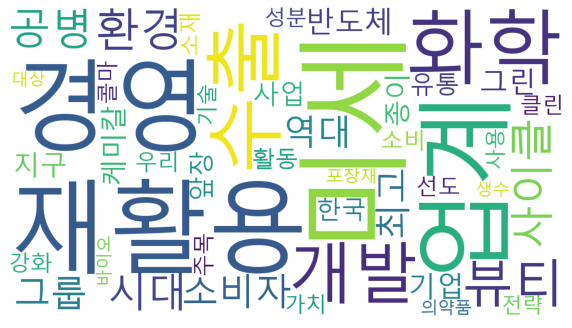

In [18]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                        background_color = 'white',
                        width = 1280,
                        height = 720)

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()